<a href="https://colab.research.google.com/github/irwanmul/test_down/blob/main/%5BIrwan_Mulyawan%5D_Down_Test_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Connecting Collab with GDrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd drive/'My Drive/Test/Down Dating Apps'

/content/drive/My Drive/Test/Down Dating Apps


#Data Loading and Setup

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('train.csv', names=['label', 'content', 'detail'])


# Understanding the Data
As you can see we have the same amount of unique data for all four categories

Number of duplicate rows: 0


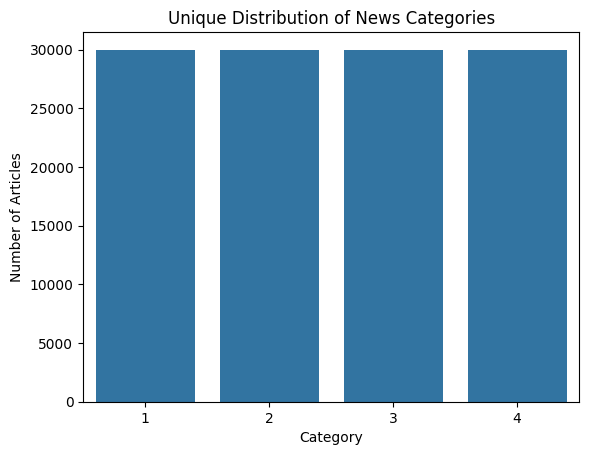

In [4]:
# Plotting the distribution of news categories
# sns.countplot(x='label', data=train)
# plt.title('Distribution of News Categories')
# plt.show()


print("Number of duplicate rows:", train.duplicated().sum())

# Remove duplicates
train_data_clean = train.drop_duplicates()

# Plot the count plot with the cleaned data
sns.countplot(x='label', data=train_data_clean)
plt.title('Unique Distribution of News Categories')
plt.xlabel('Category')
plt.ylabel('Number of Articles')
plt.show()

# Text Characteristics

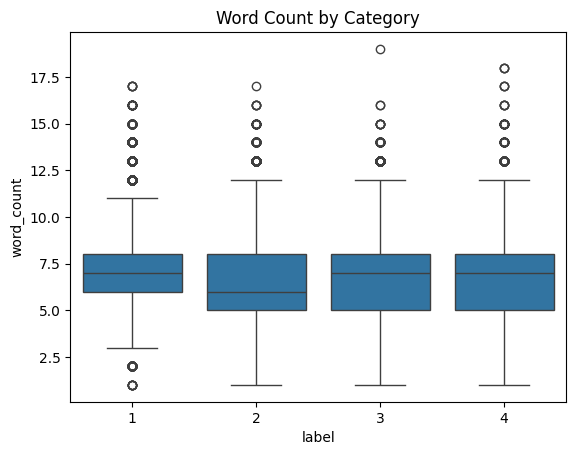

In [5]:
# Average word count per category
train['word_count'] = train['content'].apply(lambda x: len(x.split()))
sns.boxplot(x='label', y='word_count', data=train)
plt.title('Word Count by Category')
plt.show()

# Trend Analysis
Investigate if there are common words or phrases within categories using a word cloud.

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import nltk

# Ensure that nltk's resources are downloaded
nltk.download('stopwords')

data = pd.read_csv('train.csv', header=None, names=['label', 'content', 'detail'])

# Preprocessing steps
data['processed_content'] = data['content'].str.lower().str.replace(r'\W', ' ').str.replace(r'\s+', ' ')
stop_words = set(stopwords.words('english'))
data['processed_content'] = data['processed_content'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


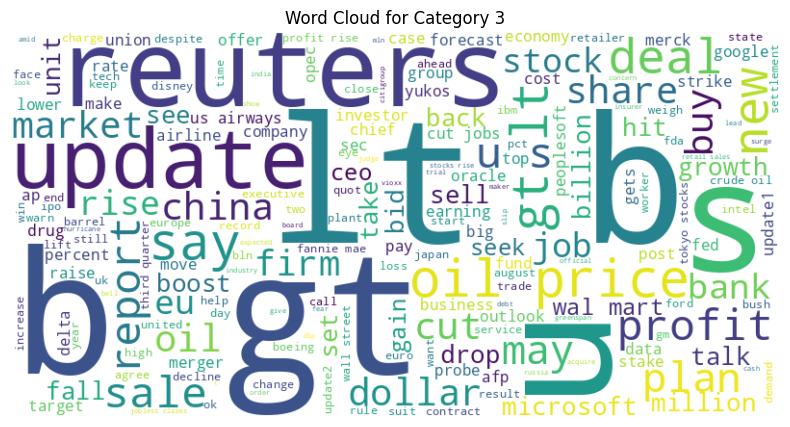

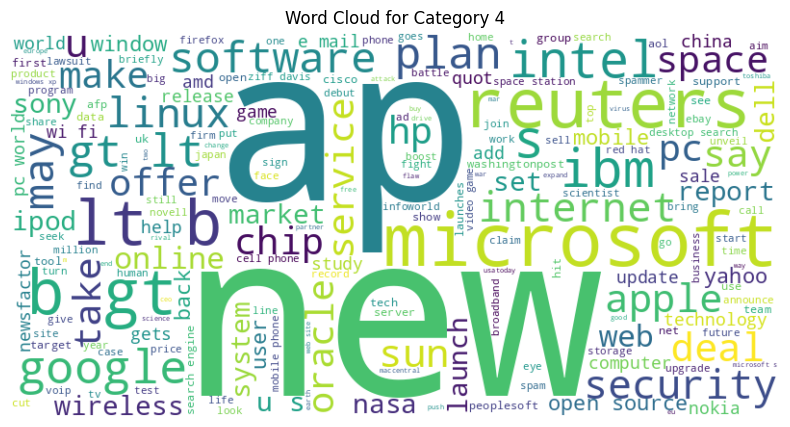

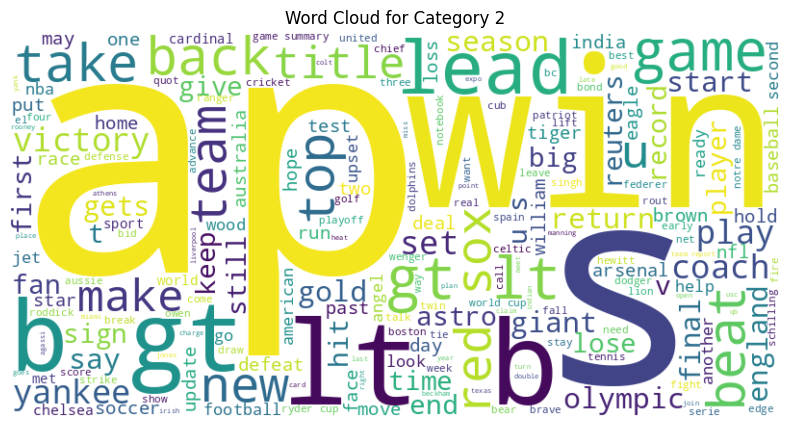

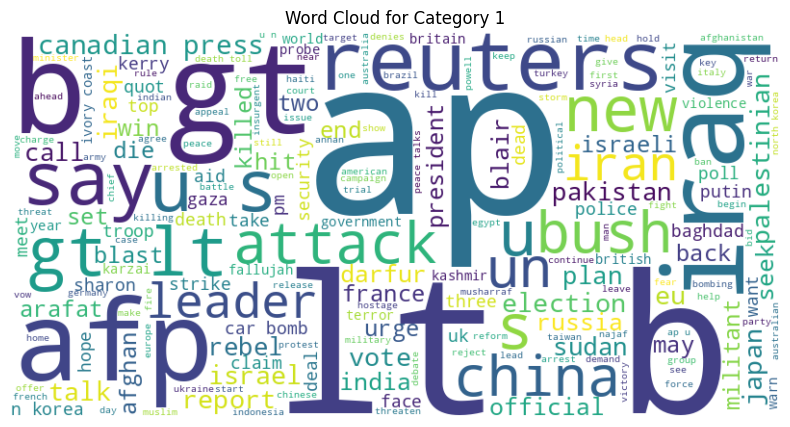

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define a function to plot word clouds
def plot_word_cloud(category):
    text = data[data['label'] == category]['processed_content'].str.cat(sep=' ')
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Category {category}')
    plt.show()

# Plot word clouds for each category
for label in data['label'].unique():
    plot_word_cloud(label)


In [8]:
# Function to extract top n-grams
def get_top_ngrams(corpus, n=None, ngrams=2):
    vec = CountVectorizer(ngram_range=(ngrams, ngrams)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

# Example of extracting top bi-grams for each category
for label in data['label'].unique():
    common_phrases = get_top_ngrams(data[data['label'] == label]['processed_content'], n=10, ngrams=2)
    print(f"Top 10 bi-grams for Category {label}:")
    for phrase, freq in common_phrases:
        print(f"{phrase}: {freq}")


Top 10 bi-grams for Category 3:
lt gt: 1308
gt lt: 654
oil prices: 582
wal mart: 230
us airways: 225
wall street: 155
profit rises: 153
crude oil: 153
fannie mae: 148
oil price: 145
Top 10 bi-grams for Category 4:
lt gt: 894
gt lt: 444
open source: 223
wi fi: 202
pc world: 191
washingtonpost com: 189
desktop search: 165
space station: 159
search engine: 154
space com: 148
Top 10 bi-grams for Category 2:
lt gt: 1216
gt lt: 608
red sox: 410
world cup: 143
ryder cup: 137
game summary: 137
notre dame: 113
team report: 106
nl wrap: 91
new york: 90
Top 10 bi-grams for Category 1:
lt gt: 1706
gt lt: 853
canadian press: 451
ivory coast: 171
car bomb: 149
peace talks: 144
death toll: 134
north korea: 116
arafat 39: 110
bush kerry: 105


# Statistical Validation
Using statistical tests (like chi-square tests for categorical data) to validate if the differences observed in distributions (e.g., word count across categories) are statistically significant.

In [9]:
import numpy as np

# Load the dataset
data = pd.read_csv('train.csv', header=None, names=['label', 'content', 'detail'])

# Process text to count words
data['word_count'] = data['content'].apply(lambda x: len(x.split()))

# Categorize word counts to make them definite
# data['word_count_bin'] = pd.cut(data['word_count'], bins=[0, 100, 200, 300, 400, np.inf], labels=['0-100', '101-200', '201-300', '301-400', '400+'])
data['word_count_bin'] = pd.cut(data['word_count'], bins=[0, 5, 10, 15, 20, np.inf], labels=['0-5', '6-10', '11-15', '16-20', '21+'])

In [10]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(data['label'], data['word_count_bin'])

print("Contingency Table:")
print(contingency_table)

# Apply the Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("\nChi-square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-value:", p)


Contingency Table:
word_count_bin    0-5   6-10  11-15  16-20
label                                     
1                6076  21667   2235     22
2               10584  18173   1238      5
3                7867  20701   1429      3
4                8503  20569    918     10

Chi-square Statistic: 2255.1899301923304
Degrees of Freedom: 9
P-value: 0.0


# Visualization findings

In [11]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Load your dataset
data = pd.read_csv('train.csv', header=None, names=['label', 'content','detail'])

# Terms you want to visualize
terms = ['economy', 'basket', 'technology', 'health', 'war', 'oil', 'us', 'russia']

# Create a document-term matrix
vectorizer = CountVectorizer(vocabulary=terms, binary=False)
dtm = vectorizer.fit_transform(data['content'].str.lower())  # Using str.lower to normalize the text

# Create a DataFrame for easier manipulation
dtm_df = pd.DataFrame(dtm.toarray(), columns=vectorizer.get_feature_names_out())
dtm_df['category'] = data['label']

# Group by category and sum occurrences
grouped = dtm_df.groupby('category').sum()
grouped = grouped.rename(index={1: 'World', 2: 'Sports', 3: 'Business', 4: 'Sci/Tech'})
grouped


,economy,basket,technology,health,war,oil,us,russia
category,,,,,,,,
World,48,0,14,90,388,272,1396,393
Sports,0,2,1,11,21,8,497,68
Business,348,0,49,103,42,2218,1905,118
Sci/Tech,8,2,258,39,108,35,353,85


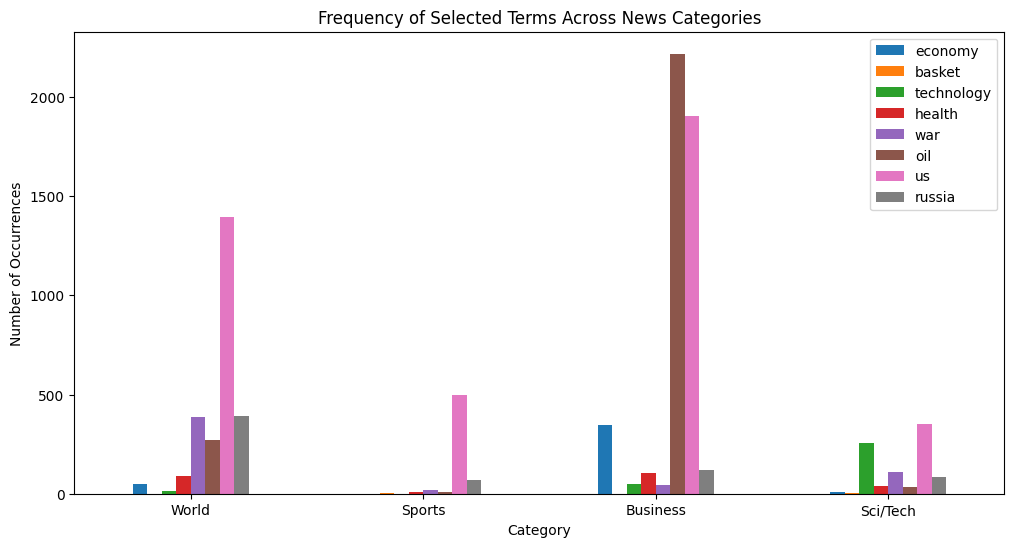

In [12]:
import matplotlib.pyplot as plt

grouped.plot(kind='bar', figsize=(12, 6))
plt.title('Frequency of Selected Terms Across News Categories')
plt.xlabel('Category')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=0)  # Keeps category names horizontal
plt.show()


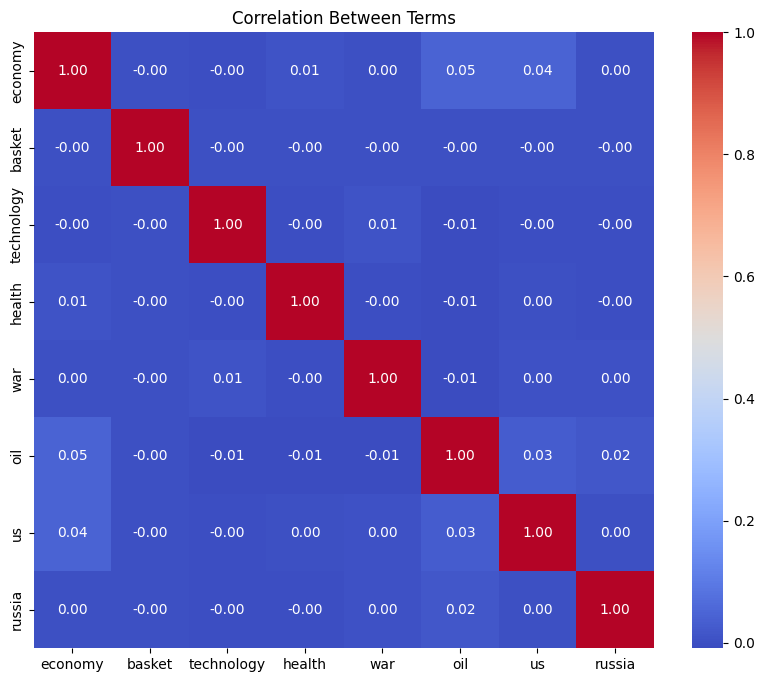

In [13]:
correlation_matrix = dtm_df[terms].corr()

# Plotting
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Terms')
plt.show()


# Bonus

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load data
train_data = pd.read_csv('train.csv', header=None, names=['label', 'content', 'detail'])
test_data = pd.read_csv('test.csv', header=None, names=['label', 'content', 'detail'])

# Preview the data
print(train_data.head())


   label                                            content  \
0      3  Wall St. Bears Claw Back Into the Black (Reuters)   
1      3  Carlyle Looks Toward Commercial Aerospace (Reu...   
2      3    Oil and Economy Cloud Stocks' Outlook (Reuters)   
3      3  Iraq Halts Oil Exports from Main Southern Pipe...   
4      3  Oil prices soar to all-time record, posing new...   

                                              detail  
0  Reuters - Short-sellers, Wall Street's dwindli...  
1  Reuters - Private investment firm Carlyle Grou...  
2  Reuters - Soaring crude prices plus worries\ab...  
3  Reuters - Authorities have halted oil export\f...  
4  AFP - Tearaway world oil prices, toppling reco...  


### Text Preprocessing
Will convert all text to lowercase, removing punctuation, and vectorizing the text.

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Text preprocessing and vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)

X_train = vectorizer.fit_transform(train_data['content'])
y_train = train_data['label']
X_test = vectorizer.transform(test_data['content'])
y_test = test_data['label']


### Training the Model
Start with a simple and effective model like Multinomial Naive Bayes, which is commonly used for text classification tasks.

In [16]:
from sklearn.naive_bayes import MultinomialNB

# Initialize the classifier
model = MultinomialNB()

# Train the model
model.fit(X_train, y_train)

MultinomialNB()

### Model Evaluation
Evaluate the model on the test data to see how well it generalizes.

In [17]:
from sklearn.metrics import classification_report, accuracy_score

# Predict on the test set
y_pred = model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.84      0.87      0.85      1900
           2       0.90      0.91      0.91      1900
           3       0.82      0.81      0.81      1900
           4       0.84      0.83      0.83      1900

    accuracy                           0.85      7600
   macro avg       0.85      0.85      0.85      7600
weighted avg       0.85      0.85      0.85      7600

Accuracy: 0.8526315789473684
